# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP) (slide 53 of the slides)

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [31]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [32]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [33]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [34]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9983128423378791
Test score:   0.9973658105322623


Text(0, 0.5, 'Loss')

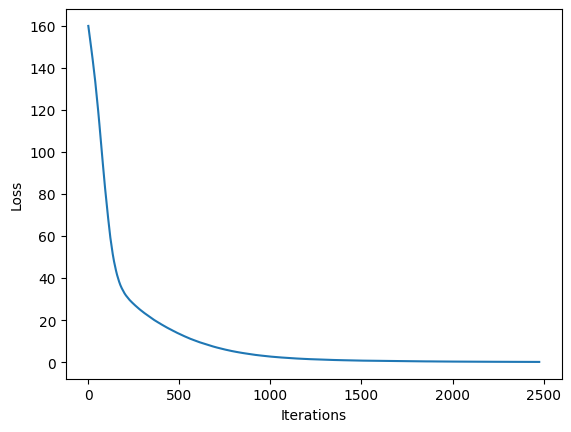

In [35]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'f(examples)')

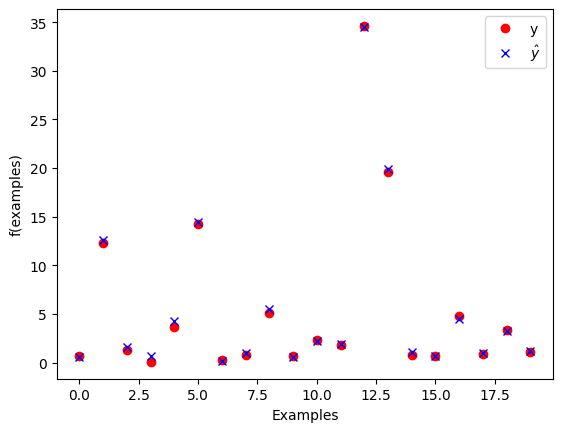

In [36]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.

- What is the structure of the network?
    - The MLPRegressor network is a neural network, by default it has one hidden layer containing 100 neurons. 
- What it is the algorithm used for training? Is there an algorithm available that we mentioned during the courses?
    - The training algorithm which is used is Adam. This is the solver for weight optimization of the neural network. The Adam algorithm is used for large datasets (thousands of training samples or more). 
    - 'sgd' or the "stochastic gradient descent" is an option which is an algorithm that we talked about in class. Adam is an optimized version of this approach. 
- How does the training algorithm decide to stop the training?
    - The algorithm stops iteration after:
        - having finished max number of iterations
        or 
        - convergence reached, determined by 'tol' which is by default 0.0001. This mecanism compares the current loss with tol, the tolerance for the optimization, and stops once the loss is less than tol. 

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [37]:
# clean all previously defined variables for the sailing boats
%reset -f

In [38]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
import pandas as pd

num_samples = 2000 # only use the first N samples to limit training time

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)[:num_samples]
y = cal_housing.target[:num_samples]

X.head(10) # print the first 10 values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Extracting a subpart of the dataset for testing

- Split the dataset between a training set (75%) and a test set (25%)

Please use the conventional names `X_train`, `X_test`, `y_train` and `y_test`.

In [39]:
# TODO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size = 0.25)

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

 - Apply the standard scaler to both the training dataset (`X_train`) and the test dataset (`X_test`).
 - Make sure that **exactly the same transformation** is applied to both datasets.

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [44]:
# TODO
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

#We calculate the 'global' mean which is used during the transformation
scaler.fit(X) 

#Transforming the two datasets to be centered on 0 and with a fixed variance
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible.

- Propose a parameterization of the network (shape and learning parameters) that will maximize the train score (without considering the test score).
    - We propose a neural network of 6 hidden layers of 100 neurons each. 

While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

- Is the **test** score substantially smaller than the **train** score (indicator of overfitting) ?
    - Yes, the test score is about 20% worse than the train score.
- Explain how the parameters you chose allow the learned model to overfit.
    - We chose to create a neural network containing more layers and neurons than what is necessary for our dataset. This way, the polynomial function the regressor creates to model the features of the dataset is too specific, meaning the test score will be substantially worse than the recognition rate of the training set since it is fitted to recognize small differences in the training set. 

In [68]:
%%time 
#The "time" cell magic function allows us to visualize the time it takes to train and test our mlp
# TODO
# Defining a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor

# define the model, with our params to maximize training score
mlp = MLPRegressor(max_iter=3000, hidden_layer_sizes=(100,100,100,100,100,100), random_state=1) 
mlp.fit(X_train_scaled, y_train) # train the MLP 

print(f"Train score: {mlp.score(X_train_scaled, y_train)}")
print(f"Test score: {mlp.score(X_test_scaled, y_test)}")

Train score: 0.9430835811976644
Test score: 0.7259472975709911
CPU times: user 45.3 s, sys: 3.9 s, total: 49.2 s
Wall time: 6.56 s


## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **test** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/test score
- training time


Present in a table the various parameters tested and the associated results. You can find in the last cell of the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [132]:
# TODO
import pandas as pd
import numpy as np
import time

data = []


#training 0
start_training = time.time()
mlp = MLPRegressor(tol=0.00001,max_iter=2500, hidden_layer_sizes=(10, 10), random_state=1) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 0
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'tol': 10e-5, 'structure': 'hidden layers: 4, neurons:(100, 100, 100, 100)','activation': 'relu', 'learning_rate_init': '0.001', 'max_iter': '500', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 1
start_training = time.time()
mlp = MLPRegressor(max_iter=2500, hidden_layer_sizes=(100, 100, 100, 100), random_state=1) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 1
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'structure': 'hidden layers: 4, neurons:(100, 100, 100, 100)','activation': 'relu', 'learning_rate_init': '0.001', 'max_iter': '2500', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 2
start_training = time.time()
mlp = MLPRegressor(max_iter=250, hidden_layer_sizes=(10, 10), random_state=1) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 2
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'structure': 'hidden layers: 2, neurons:(10, 10)','activation': 'relu', 'learning_rate_init': '0.001', 'max_iter': '250', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 3
start_training = time.time()
mlp = MLPRegressor(early_stopping=True, max_iter=2500, hidden_layer_sizes=(10, 10), random_state=1) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 3
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'structure': 'hidden layers: 2, neurons:(10, 10)','activation': 'relu', 'learning_rate_init': '0.001', 'max_iter': '2500', 'early_stopping': True, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 4
start_training = time.time()
mlp = MLPRegressor(max_iter=5000, hidden_layer_sizes=(10, 10), random_state=1, learning_rate_init=0.005) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 4
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'structure': 'hidden layers: 2, neurons:(10, 10)','activation': 'relu', 'learning_rate_init': '0.001', 'max_iter': '5000', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 5
start_training = time.time()
mlp = MLPRegressor(max_iter=5000, hidden_layer_sizes=(50), random_state=1) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 5
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'structure': 'hidden layers: 1, neurons:50','activation': 'relu', 'learning_rate_init': '0.001', 'max_iter': '5000', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 6
start_training = time.time()
mlp = MLPRegressor(max_iter=2500, hidden_layer_sizes=(10,10,10), random_state=1, learning_rate_init=0.1) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 6
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'structure': 'hidden layers: 3, neurons:(10, 10, 10)','activation': 'relu', 'learning_rate_init': '0.1', 'max_iter': '2500', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 7
start_training = time.time()
mlp = MLPRegressor(max_iter=500, hidden_layer_sizes=(10, 10), random_state=1, activation='identity') #early_stopping = False, learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 7
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'activation':'identity','structure': 'hidden layers: 2, neurons:(10, 10)', 'learning_rate_init': '0.001', 'max_iter': '500', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 8
start_training = time.time()
mlp = MLPRegressor(max_iter=500, hidden_layer_sizes=(10, 10), random_state=1, activation='tanh') #early_stopping = False, learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 8
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'activation':'tanh','structure': 'hidden layers: 2, neurons:(10, 10)', 'learning_rate_init': '0.001', 'max_iter': '500', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 9
start_training = time.time()
mlp = MLPRegressor(max_iter=500, hidden_layer_sizes=(13, 7), random_state=1) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 9
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'structure': 'hidden layers: 2, neurons:(13, 7)','activation': 'relu', 'learning_rate_init': '0.001', 'max_iter': '500', 'early_stopping': False, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})

#training 10
start_training = time.time()
mlp = MLPRegressor(max_iter=250, hidden_layer_sizes=(10, 10), random_state=1, early_stopping=True) #learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results 10
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)
data.append({'structure': 'hidden layers: 2, neurons:(10, 10)','activation': 'relu', 'learning_rate_init': '0.001', 'max_iter': '250', 'early_stopping': True, 'test_score': test_score, 'train_score': training_score, 'training_time': stop_training - start_training})


#Visualization of the data obtained from our tests
table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,tol,structure,activation,learning_rate_init,max_iter,early_stopping,test_score,train_score,training_time
2,-,"hidden layers: 2, neurons:(10, 10)",relu,0.001,250,False,0.812961,0.773523,0.260011
3,-,"hidden layers: 2, neurons:(10, 10)",relu,0.001,2500,True,0.807264,0.766763,0.283058
10,-,"hidden layers: 2, neurons:(10, 10)",relu,0.001,250,True,0.807264,0.766763,0.312225
6,-,"hidden layers: 3, neurons:(10, 10, 10)",relu,0.1,2500,False,0.804720,0.769171,0.067964
9,-,"hidden layers: 2, neurons:(13, 7)",relu,0.001,500,False,0.802840,0.801493,0.376109
8,-,"hidden layers: 2, neurons:(10, 10)",tanh,0.001,500,False,0.796436,0.809232,0.406031
0,0.0001,"hidden layers: 4, neurons:(100, 100, 100, 100)",relu,0.001,500,False,0.792111,0.828632,0.778003
4,-,"hidden layers: 2, neurons:(10, 10)",relu,0.001,5000,False,0.789289,0.830669,0.281666
5,-,"hidden layers: 1, neurons:50",relu,0.001,5000,False,0.787263,0.821677,1.058776
1,-,"hidden layers: 4, neurons:(100, 100, 100, 100)",relu,0.001,2500,False,0.771896,0.944599,6.258711


## Evaluation

- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?
    - The best model seems to be one with 2 hidden layers of 10 neurons each. This way, we achieve good training and test scores, without overfitting. We trained this model using 250 as the max number of iterations. We kept the default values for learning_rate_init (0.001), activation model ('relu'), tol (10e-4) and early_stopping (False). 
Unless you used cross-validation, you have probably used the "test" set to select the best model among the ones you experimented with.
Since your model is the one that worked best on the "test" set, your selection is *biased*.

In all rigor the original dataset should be split in three:

- the **training set**, on which each model is trained
- the **validation set**, that is used to pick the best parameters of the model 
- the **test set**, on which we evaluate the final model


Evaluate the score of your algorithm on a test set that was not used for training nor for model selection.



In [137]:
# TODO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_training, X_1, y_training, y_1 = train_test_split(X, y,random_state=1, test_size = 0.25) #training = 0.75
X_test, X_validation, y_test, y_validation = train_test_split(X_1, y_1, random_state=1, test_size=0.5)

#We calculate the 'global' mean which is used during the transformation
scaler.fit(X) 

#Transforming the two datasets to be centered on 0 and with a fixed variance
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#training with our best model
start_training = time.time()
mlp = MLPRegressor(max_iter=250, hidden_layer_sizes=(10, 10), random_state=1) #early_stopping: false and learning_rate_init: 0.001, activation: 'relu'
mlp.fit(X_train_scaled, y_train) # train the MLP 
stop_training = time.time()
#results
training_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)

print(training_score)
print(test_score)
print(stop_training-start_training)

0.7735227581042599
0.7949507955559978
0.19104290008544922
